In [1]:
using Arpack
using LinearAlgebra
using CairoMakie
using LaTeXStrings
using Statistics
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/concentrated_new/lattice_BZ.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/bc_sign_flip/rmg_spinors.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/bc_sign_flip/patch_methods.jl")

spinor_inner (generic function with 1 method)

In [8]:
# general parameters
pd = 50
kappa = 1
w = 10^(-5) * kappa
spacing = 0.4 * (w / 2 / pd)

4.000000000000001e-8

In [9]:
# RMG parameters
a = 4*pi/(3*kappa)
uD = 10^(-3)
t0 = 3
t1 = 0
t2 = 0
t3 = 0
t4 = 0
Nl = 1

1

In [10]:
# 3-patch parameters
alpha = -im * a * 3 * sqrt(3) / (8 * pi)
delta = 1
vF = 0

0

In [11]:
index = 1

1

In [12]:
function rmg_bc_comparison(pd, w, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index, kappa, vF, delta, alpha)
    # get an mBZ centered at the kappa-point
    grid_sor = make_hex([kappa, 0], w / 2, w / 2 / pd)

    grid_patch = make_hex([0, 0], w / 2, w / 2 / pd)

    sor_bc = rmg_spinor_bc(grid_sor, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index)

    patch_bc = rmg_patch_bc(grid_patch, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index, kappa, vF, delta, alpha)

    fig = Figure(size=(2000, 800), fontsize=25)

    ax1 = Axis(fig[1, 1], title = L"\text{3-Patch } \Omega (\textbf{k})", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax1, grid_patch[:, 1], grid_patch[:, 2], patch_bc, colormap = :Spectral)
    X, ax1, tr1 = tricontourf(grid_patch[:, 1], grid_patch[:, 2], patch_bc, colormap = :Spectral)
    cb1 = Colorbar(fig[1, 2], tr1)

    ax3 = Axis(fig[1, 3], title = L"\text{Spinor } \Omega (\textbf{k}) \text{ @ } \kappa", xlabel = L"k_x", ylabel = L"k_y")
    tricontourf!(ax3, grid_sor[:, 1], grid_sor[:, 2], sor_bc, colormap = :Spectral)
    X, ax3, tr3 = tricontourf(grid_sor[:, 1], grid_sor[:, 2], sor_bc, colormap = :Spectral)
    cb3 = Colorbar(fig[1, 4], tr3)

    fig
end

rmg_bc_comparison (generic function with 1 method)

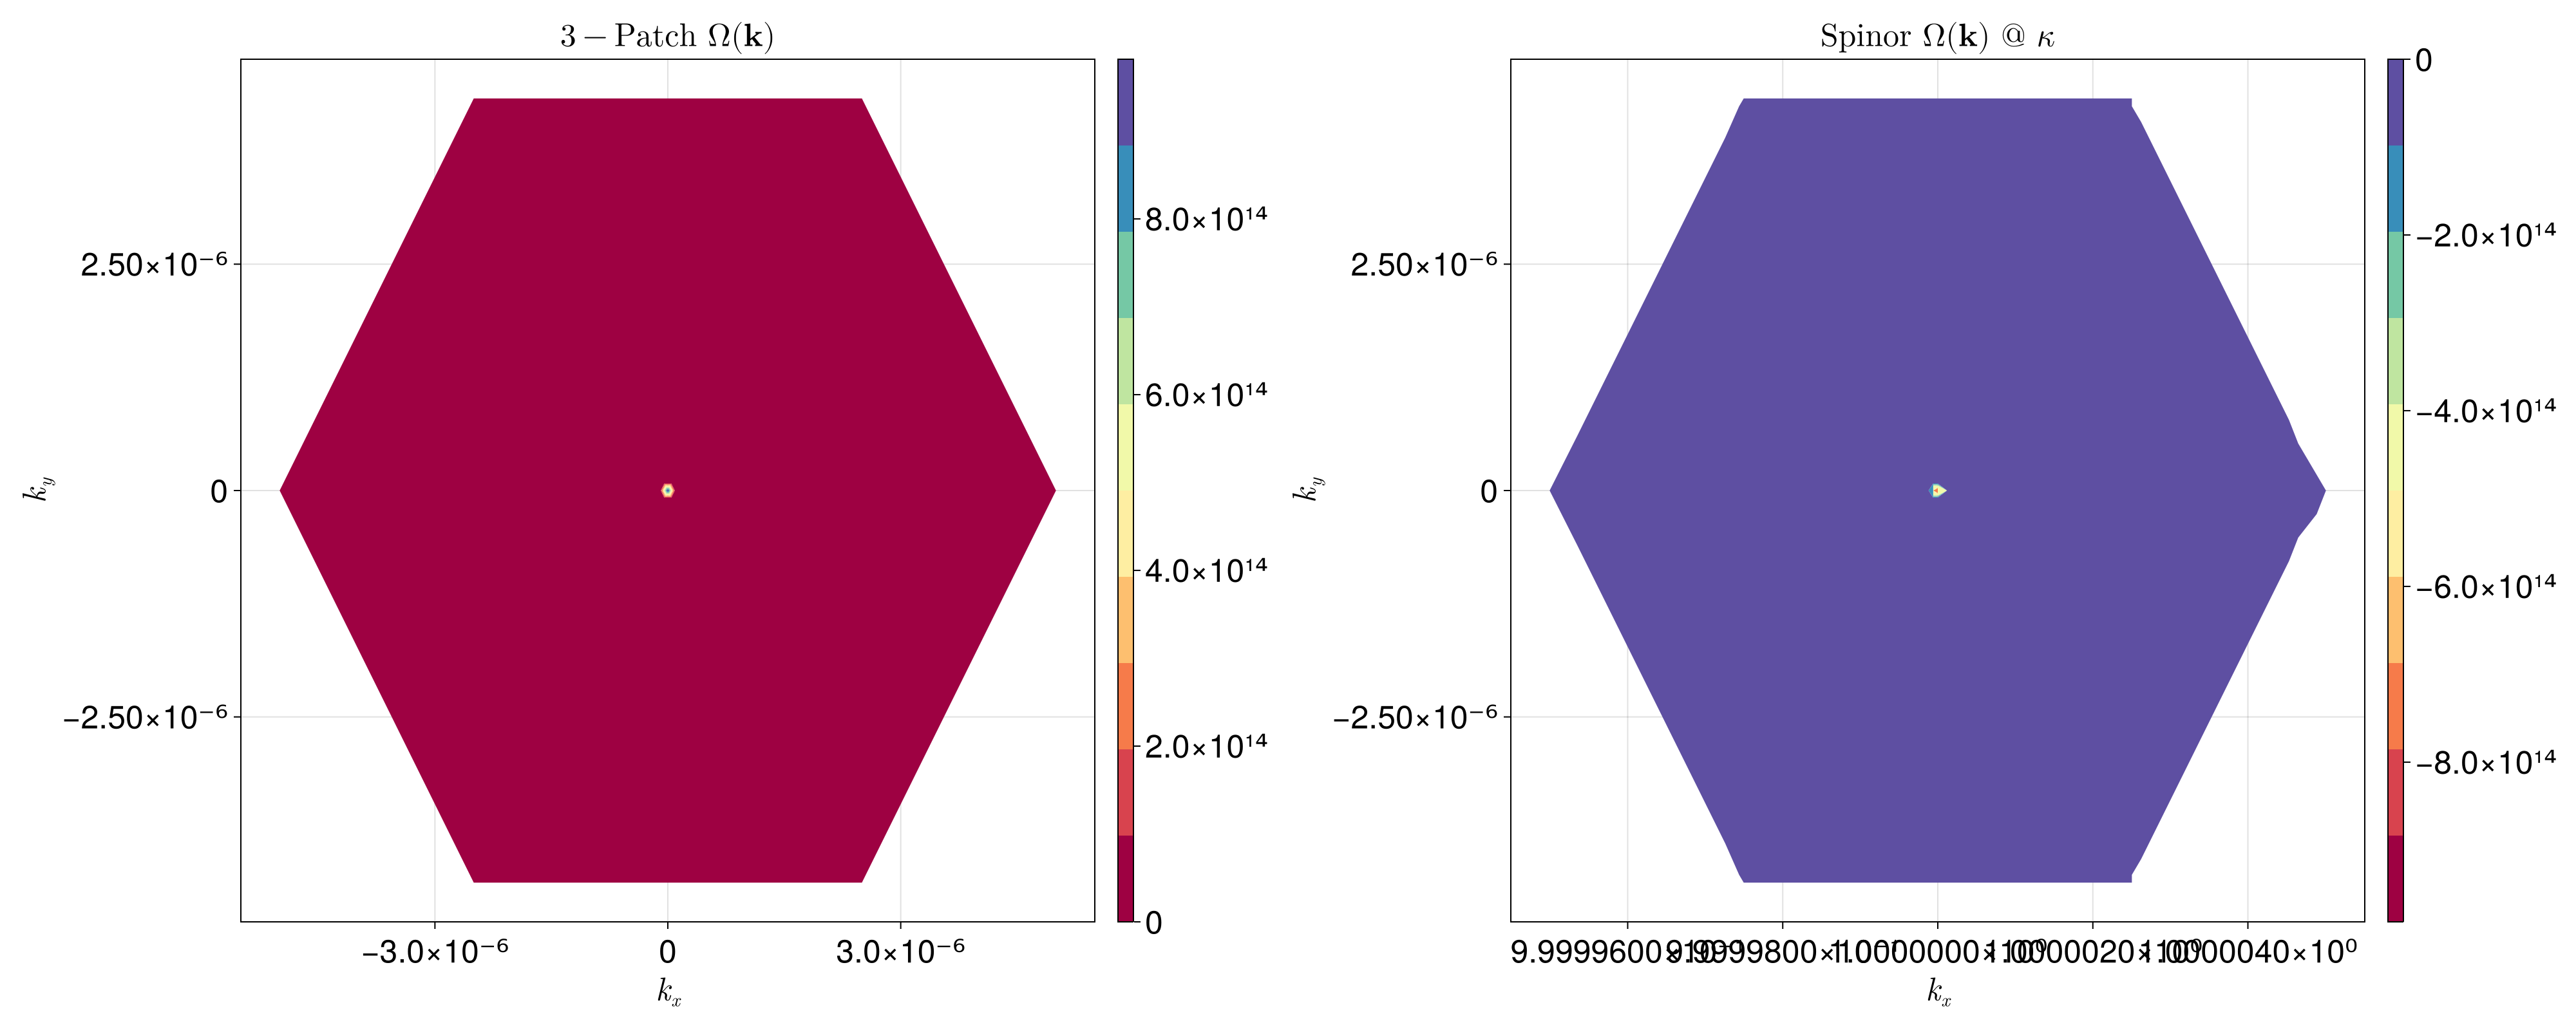

In [13]:
rmg_bc_comparison(pd, w, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index, kappa, vF, delta, alpha)

In [195]:
function origin_bc_t0_uD(pd, w, spacing, a, t1, t2, t3, t4, Nl, index, kappa, vF, delta, alpha)
    spacing = 10^(-5) * (w / 2 / pd)
    # create plot
    fig = Figure(size=(1800, 1200), fontsize=30)
    grid = reshape([10^-14, 10^-14], (1, 2))
    grid_sor = reshape([kappa + 10^-14, 0 + 10^-14], (1, 2))

    t_list = range(-1, 1, pd)
    uD_list = range(-1, 1, pd)

    # make parameter mesh-grid
    param_grid = Array{Float64}(undef, pd^2, 2)
    counter = 1
    for i in 1:pd
        for j in 1:pd
            param_grid[counter, 1] = t_list[i]
            param_grid[counter, 2] = uD_list[j]
            counter += 1
        end
    end

    curvatures = Array{Float64}(undef, pd^2)
    sor_curvatures = Array{Float64}(undef, pd^2)
    patch_curvatures = Array{Float64}(undef, pd^2)
    for j in 1:pd^2
        t0 = param_grid[j, 1]
        uD = param_grid[j, 2]
        temp_c = rmg_patch_bc(grid, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index, kappa, vF, delta, alpha)[1]
        sor_bc = rmg_spinor_bc(grid_sor, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index)[1]
        patch_curvatures[j] = temp_c
        sor_curvatures[j] = sor_bc
        curvatures[j] = temp_c + sor_bc
    end
    ax1 = Axis(fig[1, 1], title = L"\Omega_{G}(\textbf{\kappa_1})", xlabel = L"t_0", 
    ylabel = L"u_D")
    tricontourf!(ax1, param_grid[:, 1], param_grid[:, 2], sor_curvatures, colormap = :Spectral)
    X, ax1, tr1 = tricontourf(param_grid[:, 1], param_grid[:, 2], sor_curvatures, colormap = :Spectral)
    cb1 = Colorbar(fig[1, 2], tr1)

    ax1 = Axis(fig[1, 3], title = L"\Omega_{3P}(0, 0)", xlabel = L"t_0", 
    ylabel = L"u_D")
    tricontourf!(ax1, param_grid[:, 1], param_grid[:, 2], patch_curvatures, colormap = :Spectral)
    X, ax1, tr1 = tricontourf(param_grid[:, 1], param_grid[:, 2], patch_curvatures, colormap = :Spectral)
    cb1 = Colorbar(fig[1, 4], tr1)


    ax1 = Axis(fig[2, 1], title = L"\Omega_{G}(\textbf{\kappa_1}) + \Omega_{3P}(0, 0)", xlabel = L"t_0", 
    ylabel = L"u_D")
    tricontourf!(ax1, param_grid[:, 1], param_grid[:, 2], curvatures, colormap = :Spectral)
    X, ax1, tr1 = tricontourf(param_grid[:, 1], param_grid[:, 2], curvatures, colormap = :Spectral)
    cb1 = Colorbar(fig[2, 2], tr1)

    fig
end

origin_bc_t0_uD (generic function with 1 method)

In [196]:
pd = 100

100

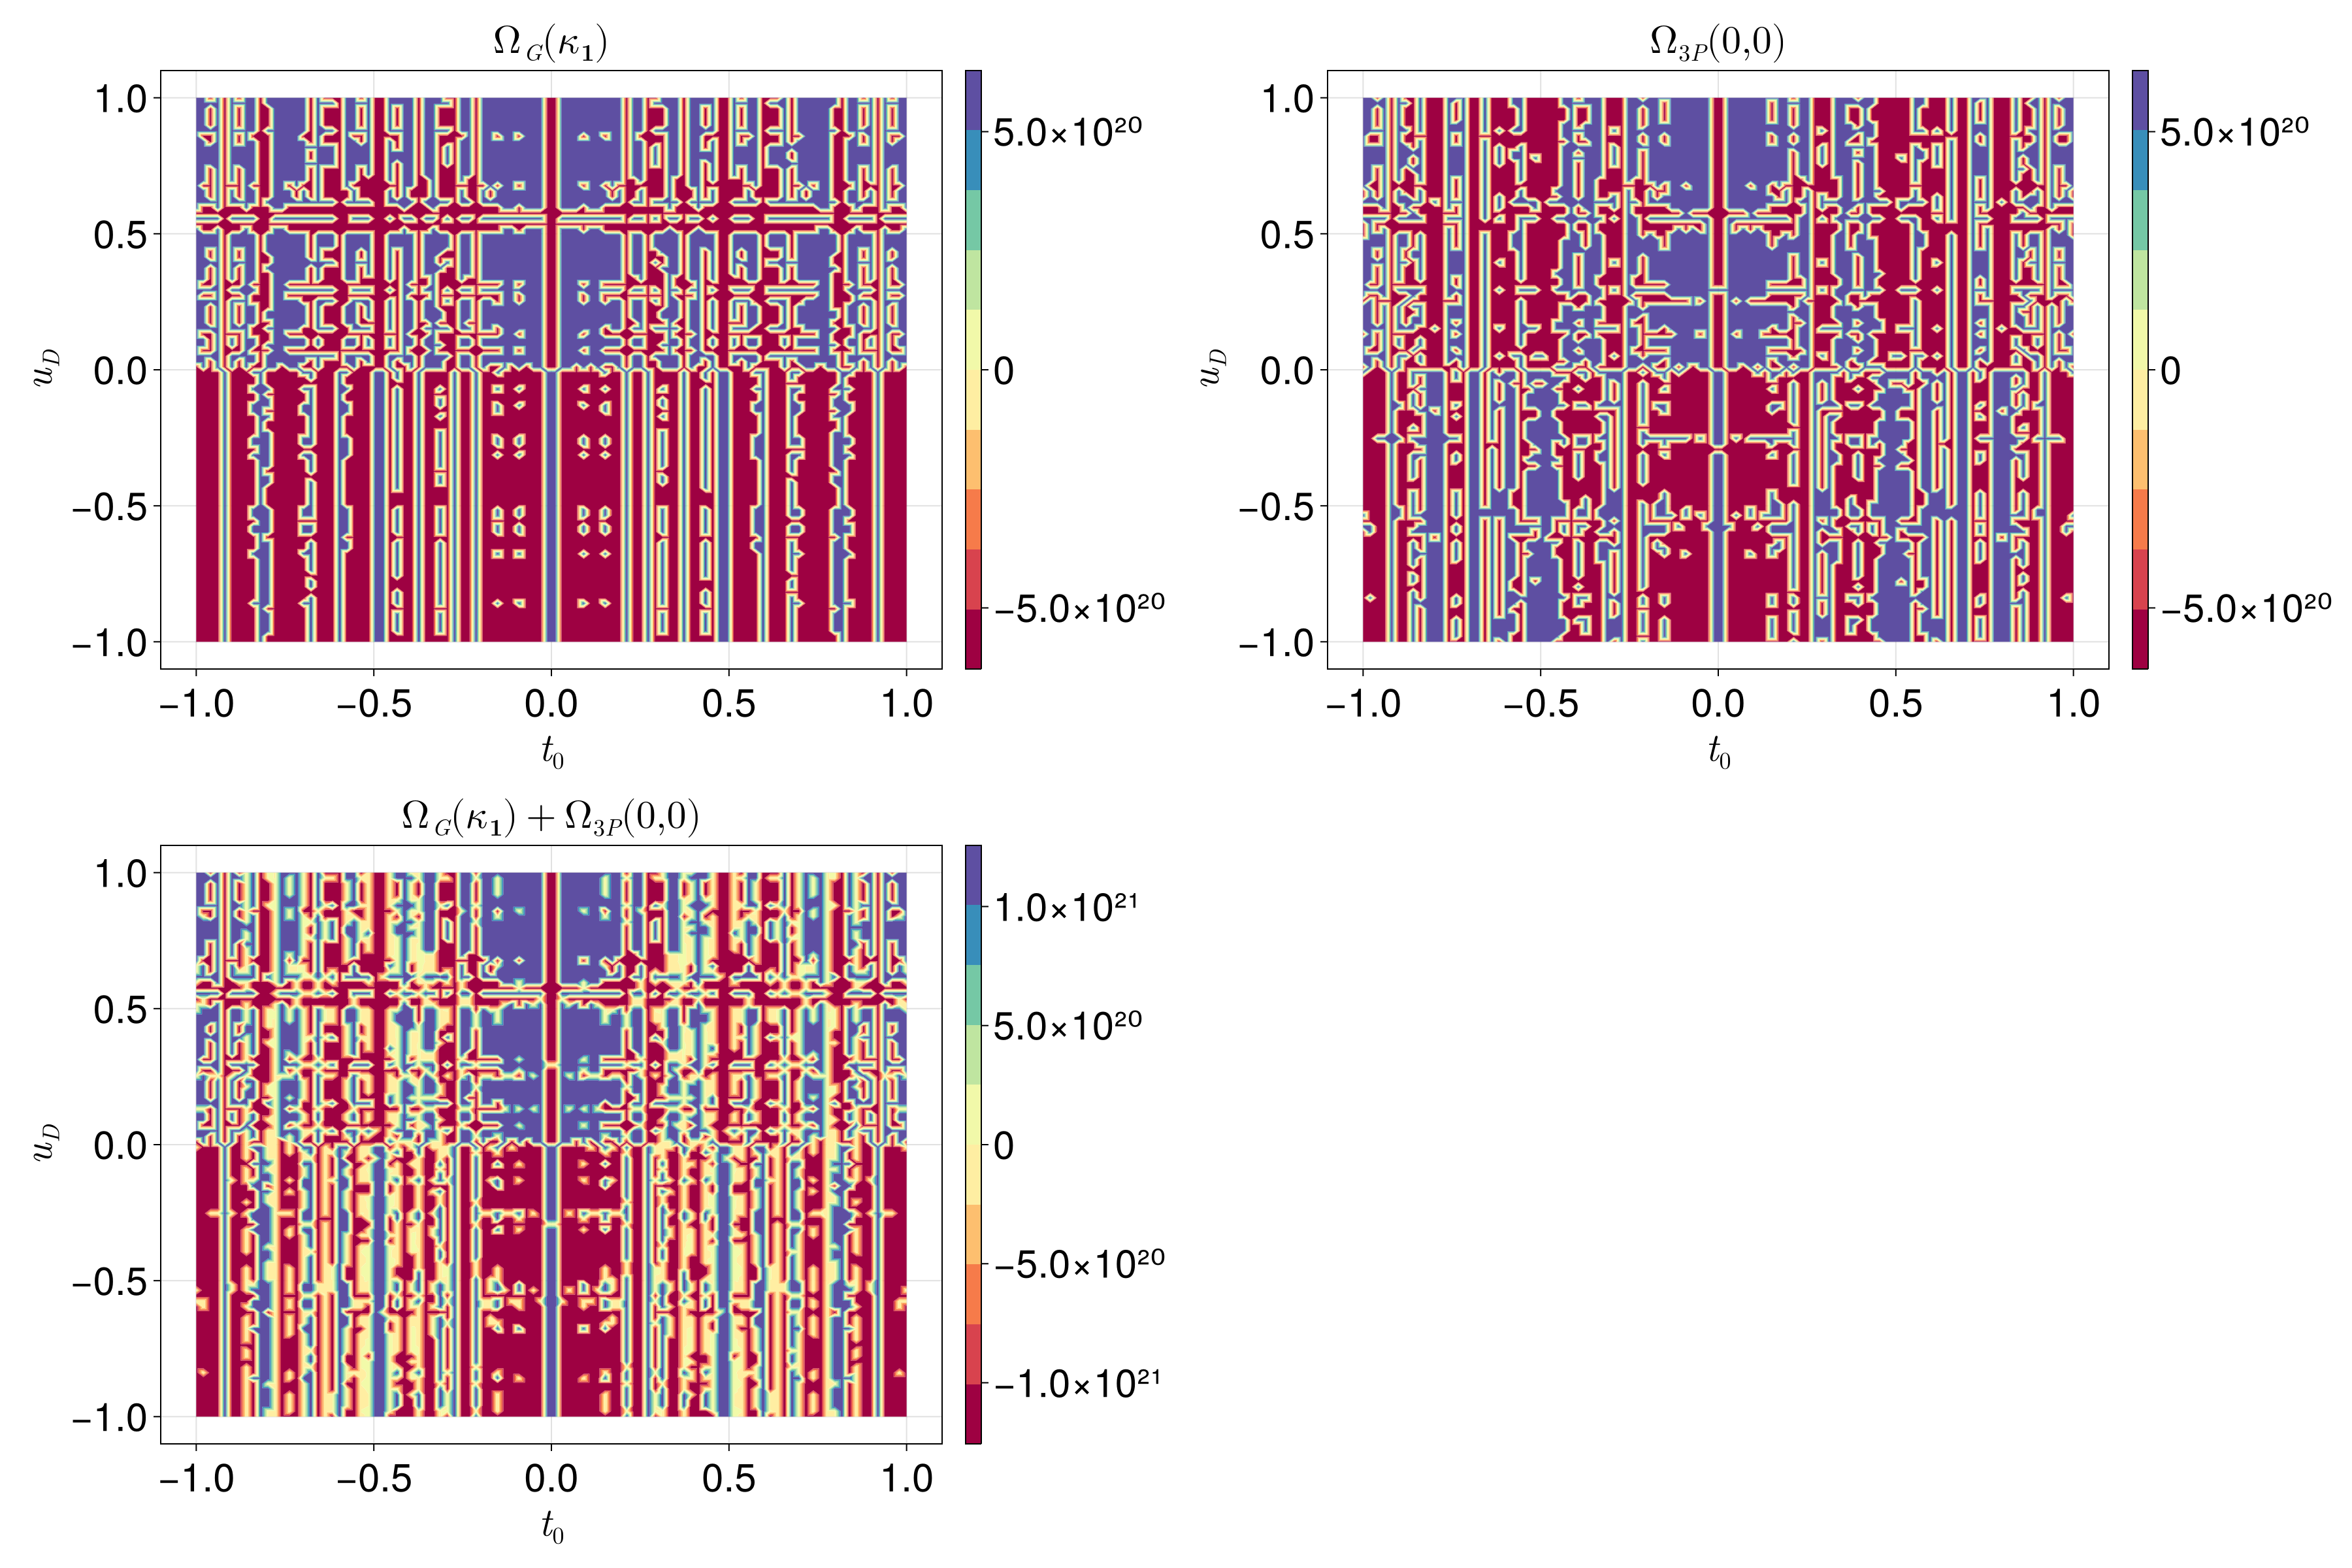

In [197]:
origin_bc_t0_uD(pd, w, spacing, a, t1, t2, t3, t4, Nl, index, kappa, vF, delta, alpha)

In [181]:
function origin_bc_t0(pd, w, spacing, a, uD, t1, t2, t3, t4, Nl, index, kappa, vF, delta, alpha)
    spacing = 10^(-5) * (w / 2 / pd)
    # create plot
    fig = Figure(size=(900, 800), fontsize=30)
    grid = reshape([10^-14, 10^-14], (1, 2))
    grid_sor = reshape([kappa + 10^-14, 0 + 10^-14], (1, 2))

    samps = 10^3
    t_list = range(-10, 10, samps)

    curvatures = Array{Float64}(undef, samps)
    for j in 1:samps
        t0 = t_list[j]
        temp_c = rmg_patch_bc(grid, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index, kappa, vF, delta, alpha)[1]
        sor_bc = rmg_spinor_bc(grid_sor, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index)[1]
        curvatures[j] = sor_bc + temp_c
    end
    ax1 = Axis(fig[1, 1], title = L"t_0 \text{vs} \ log_{10}(|\Omega_{G}(\textbf{\kappa_1}) - \Omega_{3P}(0, 0)|)", xlabel = L"t_0", 
    ylabel = L"log_{10}(|\Omega_{G}(\textbf{\kappa_1}) - \Omega_{3P}(0, 0)|)")
    lines!(ax1, t_list, curvatures)
    ylims!(ax1, -5000000, 500000)
    fig
end

origin_bc_t0 (generic function with 1 method)

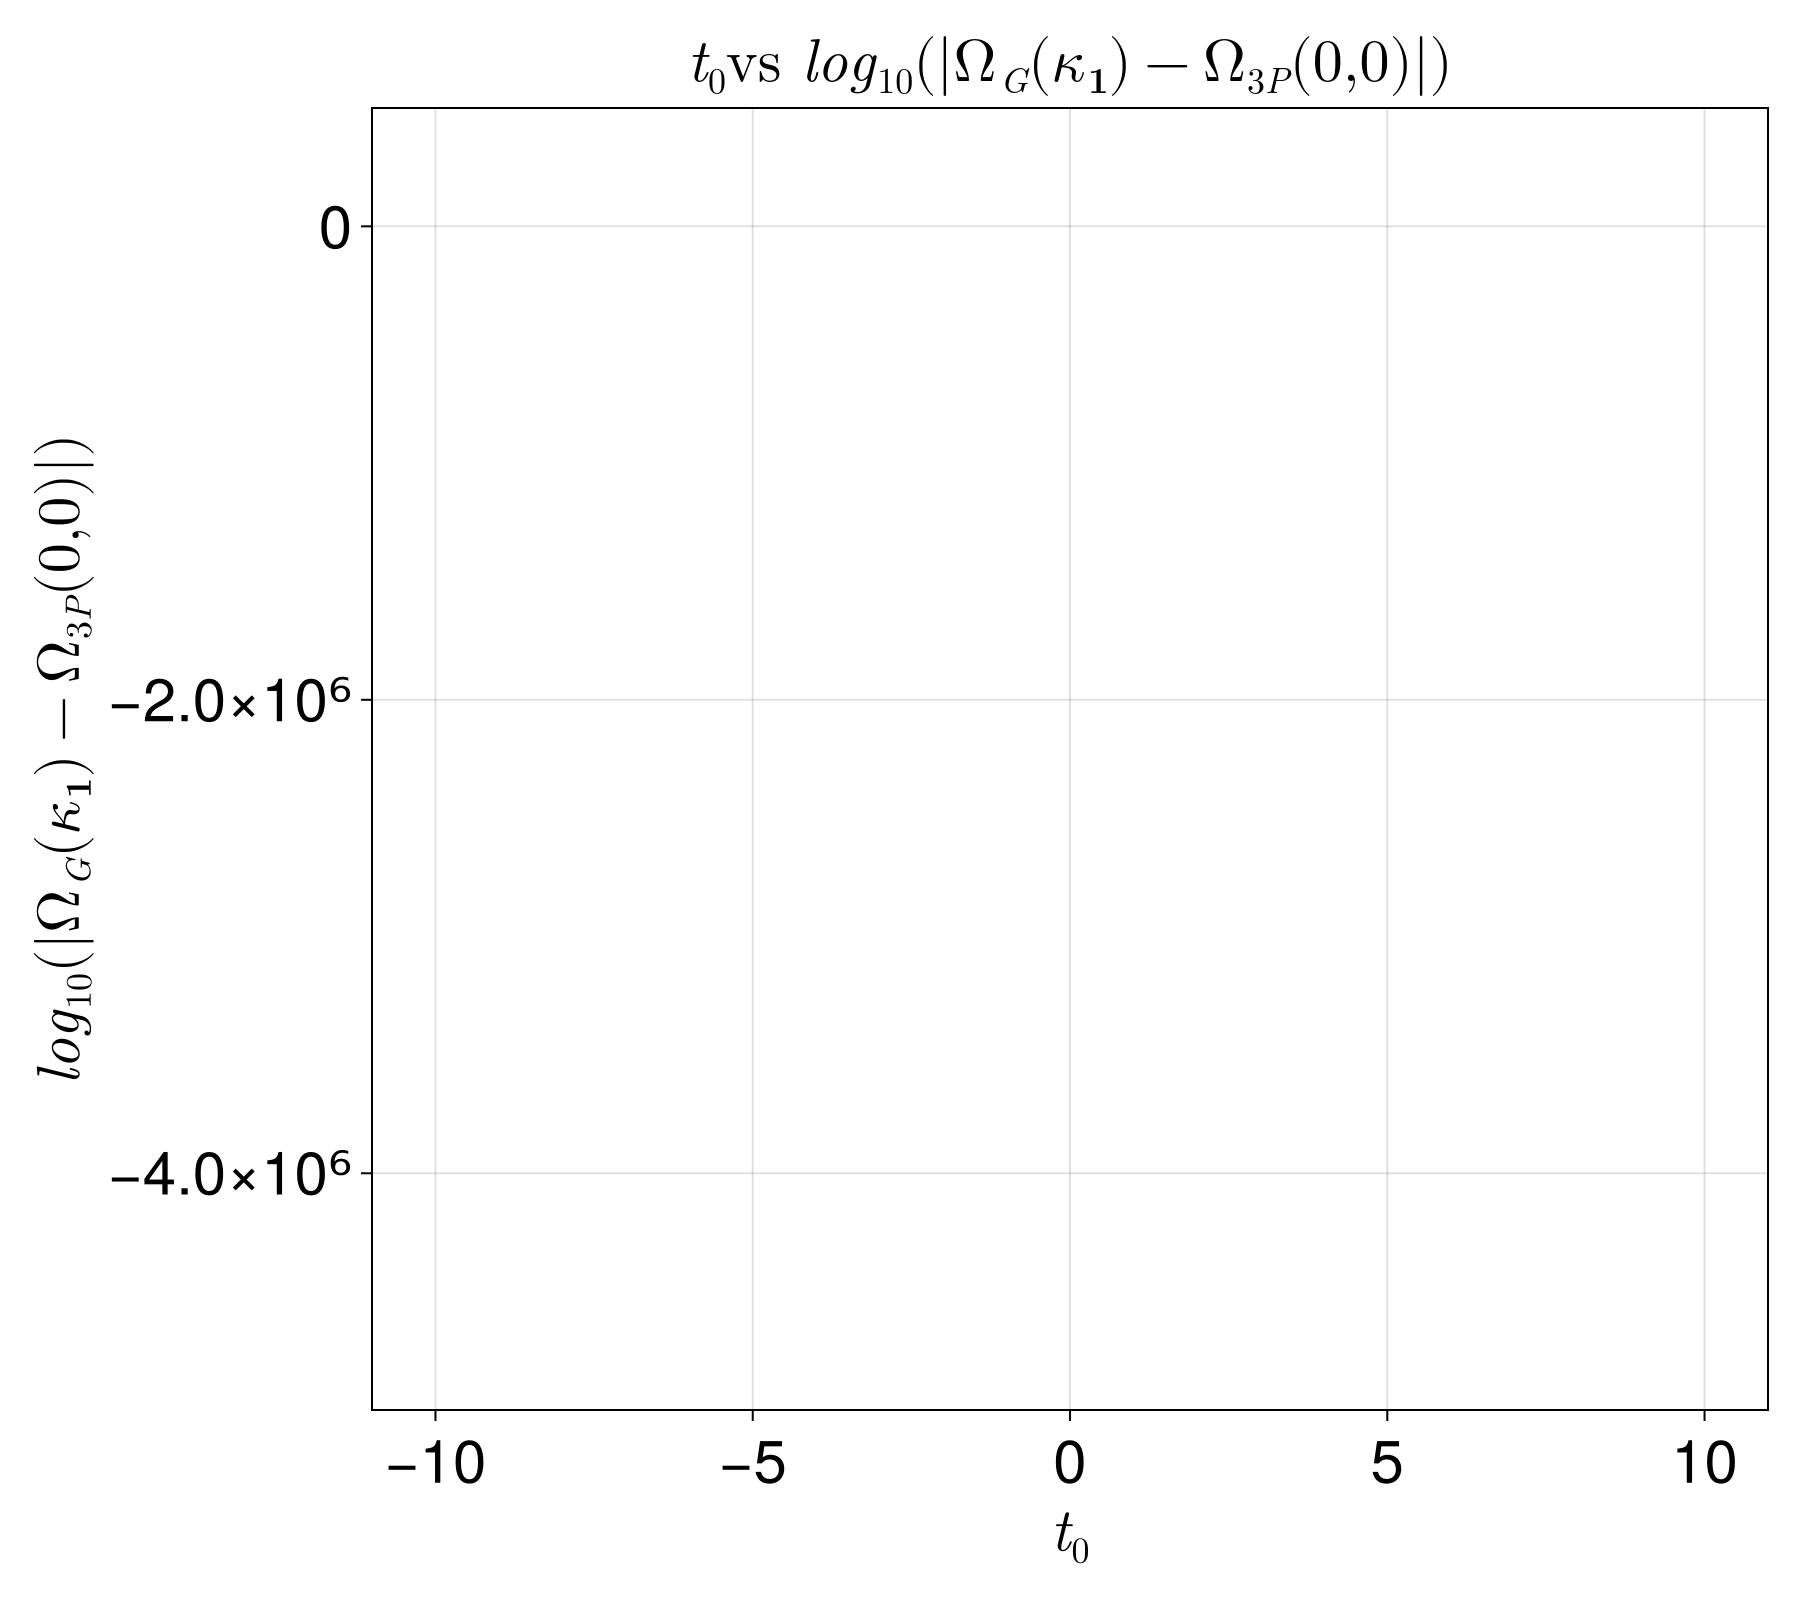

In [182]:
origin_bc_t0(pd, w, spacing, a, uD, t1, t2, t3, t4, Nl, index, kappa, vF, delta, alpha)

In [91]:
function origin_bc_t0(pd, w, spacing, a, t0, t1, t2, t3, t4, Nl, index, kappa, vF, delta, alpha)
    spacing = 10^(-5) * (w / 2 / pd)
    # create plot
    fig = Figure(size=(900, 800), fontsize=30)
    grid = reshape([10^-14, 10^-14], (1, 2))
    grid_sor = reshape([kappa + 10^-14, 0 + 10^-14], (1, 2))

    samps = 10^3
    uD_list = range(-10, 10, samps)

    curvatures = Array{Float64}(undef, samps)
    for j in 1:samps
        uD = uD_list[j]
        temp_c = rmg_patch_bc(grid, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index, kappa, vF, delta, alpha)[1]
        sor_bc = rmg_spinor_bc(grid_sor, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index)[1]
        curvatures[j] = log10.(abs.(sor_bc - temp_c))
    end
    ax1 = Axis(fig[1, 1], title = L"u_D \text{vs} \ log_{10}(|\Omega_{G}(\textbf{\kappa_1}) - \Omega_{3P}(0, 0)|)", xlabel = L"u_D", 
    ylabel = L"log_{10}(|\Omega_{G}(\textbf{\kappa_1}) - \Omega_{3P}(0, 0)|)")
    lines!(ax1, uD_list, curvatures)
    fig
end

origin_bc_t0 (generic function with 1 method)

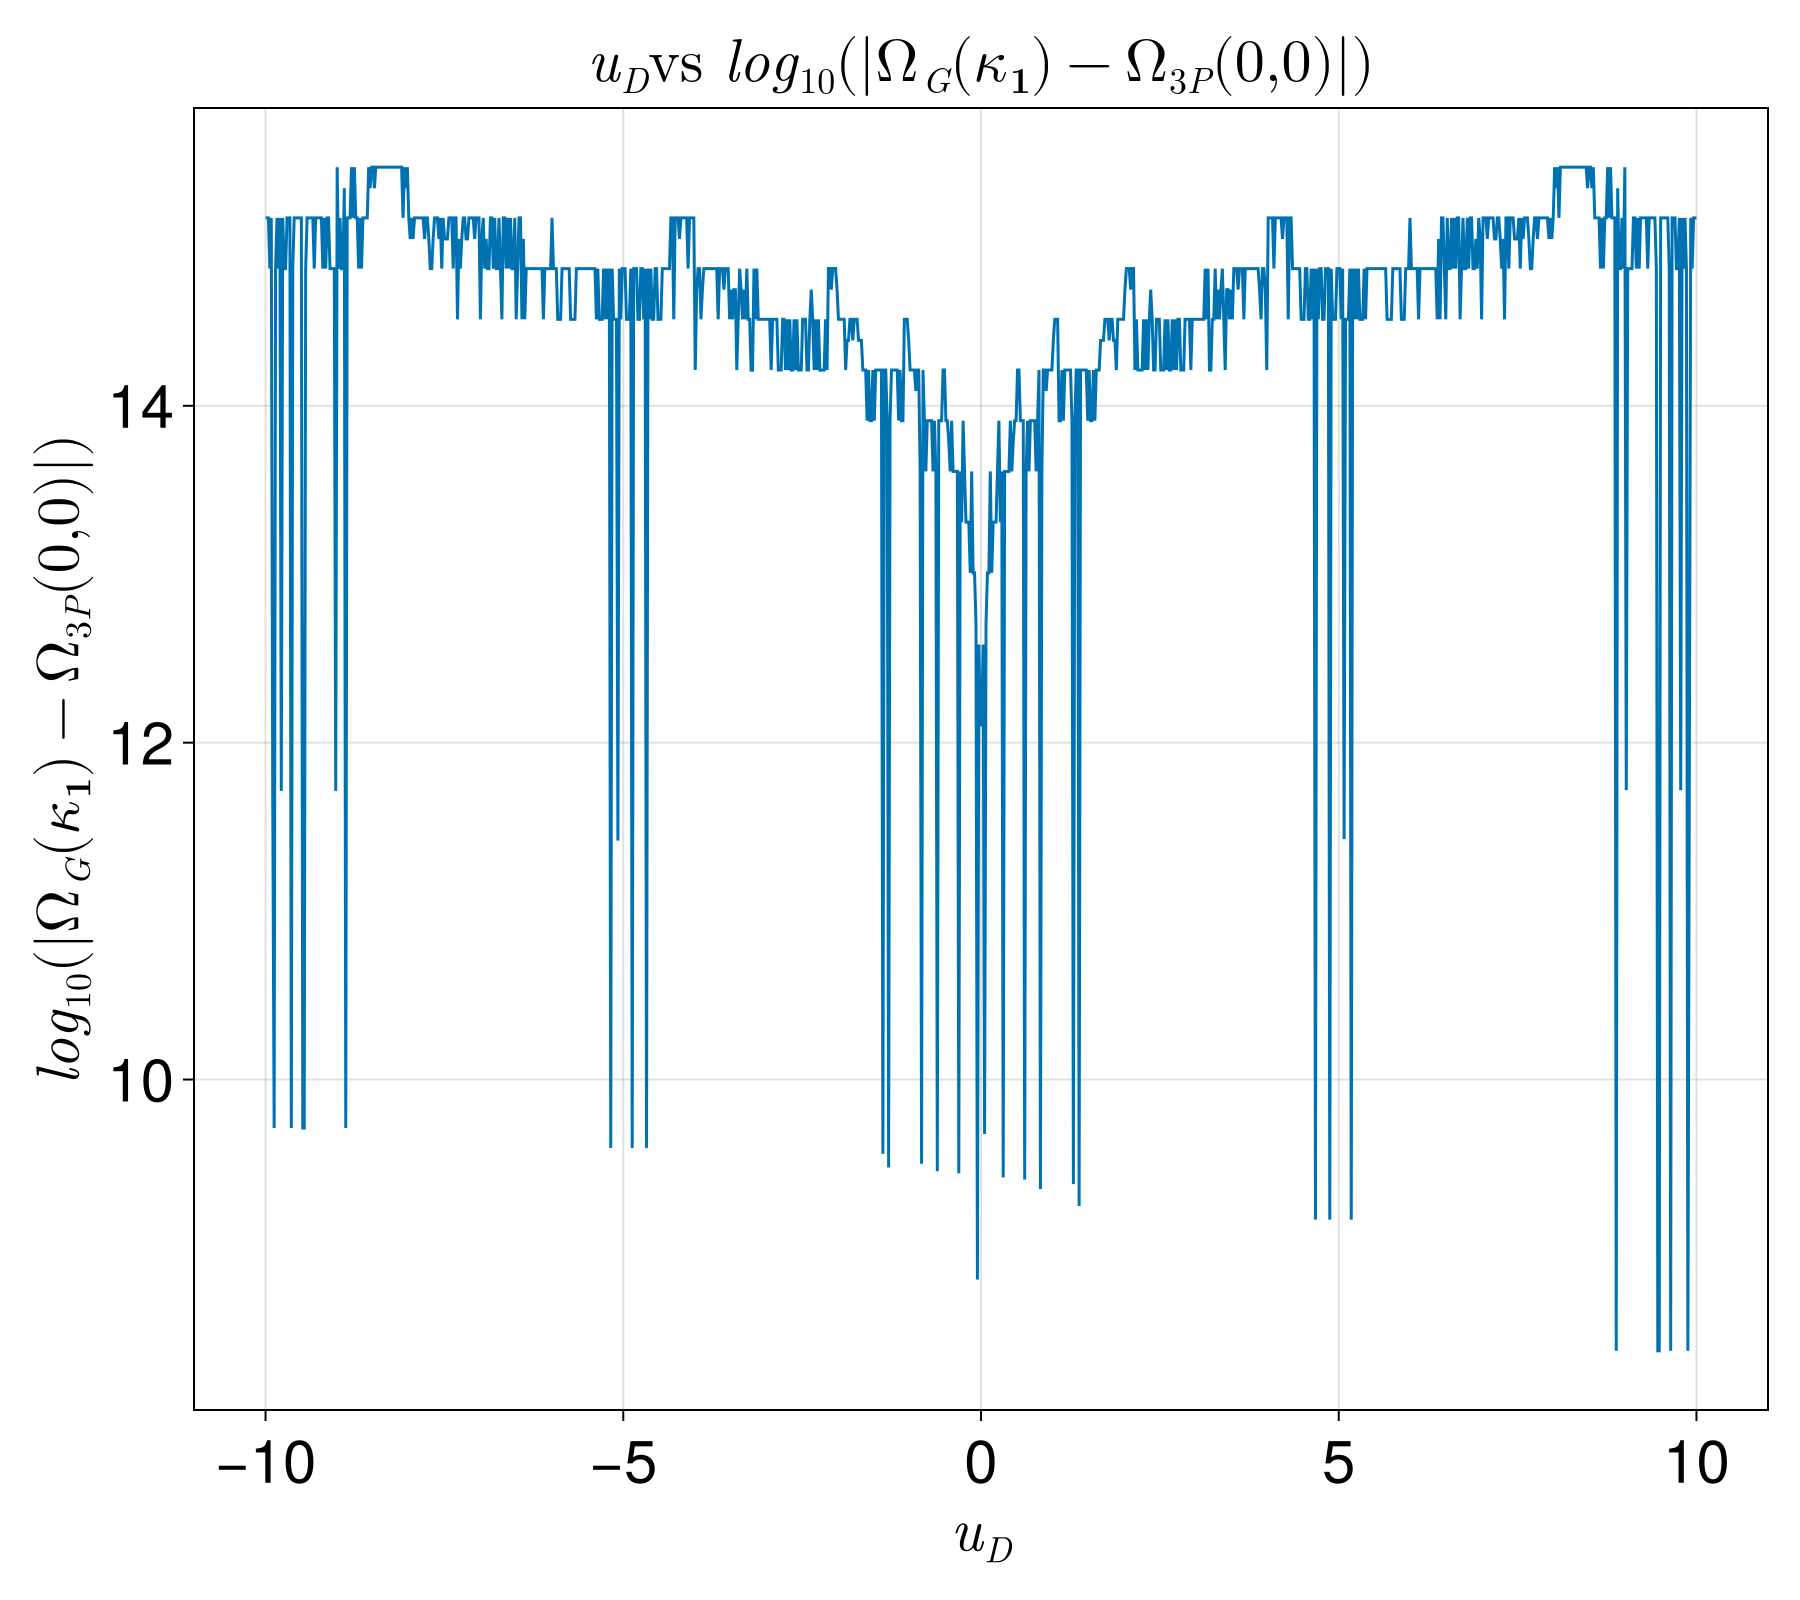

In [92]:
origin_bc_t0(pd, w, spacing, a, t0, t1, t2, t3, t4, Nl, index, kappa, vF, delta, alpha)